<h1>Salary Prediction Dataset<h1>

<h2>Introduction<h2>

The Salary Prediction Dataset contains employee information, including age, gender, education level, and other relevant details. It can be used to analyze factors affecting salaries and for building machine learning models to predict employee compensation.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv(r'c:\Data science\ML_Project\Salary_Data.csv')
print(df.head())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB
None


In [4]:
print(df.isna().sum())

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [5]:
import pandas as pd
# Drop unnecessary column if exists (for example 'id')
if 'id' in df.columns:
    df = df.drop(columns=['id'])
# Fill missing numerical values with the column mean
for col in ['Age', 'Years of Experience', 'Salary']:
    df[col].fillna(df[col].mean(), inplace=True)
print(df.info()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6704 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6704 non-null   float64
 5   Salary               6704 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB
None


In [6]:
df = df.dropna(subset=['Gender', 'Education Level', 'Job Title'])


In [7]:
for col in ['Gender', 'Education Level', 'Job Title']:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [8]:
print(df.isna().sum())

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Define features and target
X = df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
y = df['Salary']
# Handle missing values for categorical columns (fill with mode)
for col in ['Gender', 'Education Level', 'Job Title']:
    X[col].fillna(X[col].mode()[0], inplace=True)
# Encode categorical columns
le = LabelEncoder()
for col in ['Gender', 'Education Level', 'Job Title']:
    X[col] = le.fit_transform(X[col])
print(X.head())
print(y.head())


    Age  Gender  Education Level  Job Title  Years of Experience
0  32.0       1                0        176                  5.0
1  28.0       0                3         18                  3.0
2  45.0       1                5        144                 15.0
3  36.0       0                0        115                  7.0
4  52.0       1                3         25                 20.0
0     90000.0
1     65000.0
2    150000.0
3     60000.0
4    200000.0
Name: Salary, dtype: float64


C:\Users\Delfi benny\AppData\Local\Temp\ipykernel_2992\3153062722.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(X[col].mode()[0], inplace=True)
C:\Users\Delfi benny\AppData\Local\Temp\ipykernel_2992\3153062722.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(X[col].mode()[0], inplace=True)
C:\Users\Delfi benny\AppData\Local\Temp\ipykernel_2992\3153062722.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [10]:
# Features
X = df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
# Target
y = df['Salary']


(array([0, 1, 2]),
 [Text(0, 0, 'Age'), Text(1, 0, 'Years of Experience'), Text(2, 0, 'Salary')])

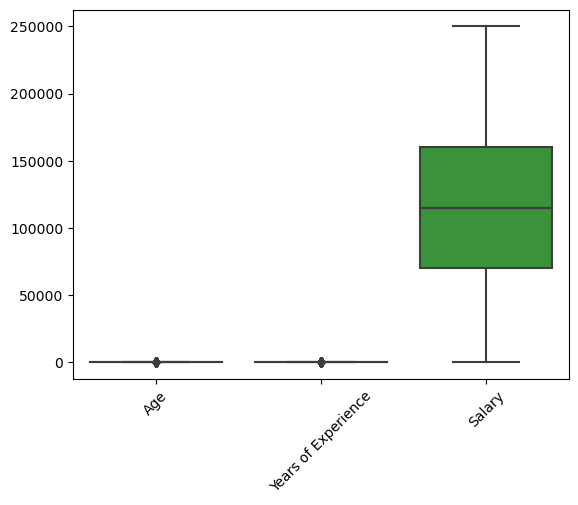

In [11]:
import seaborn as sns
sns.boxplot(df)
import matplotlib.pyplot as plt
plt.xticks(rotation=45)

In [17]:

import numpy as np
salary_mean = df['Salary'].mean()
salary_std = df['Salary'].std()
df = df[df['Salary'] <= salary_mean + 3*salary_std]

In [16]:
from sklearn.model_selection import train_test_split
X = df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
# Target
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Check shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (5360, 5)
X_test: (1341, 5)
y_train: (5360,)
y_test: (1341,)


In [23]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Gender', 'Education Level', 'Job Title']
X_encoded = X.copy()
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

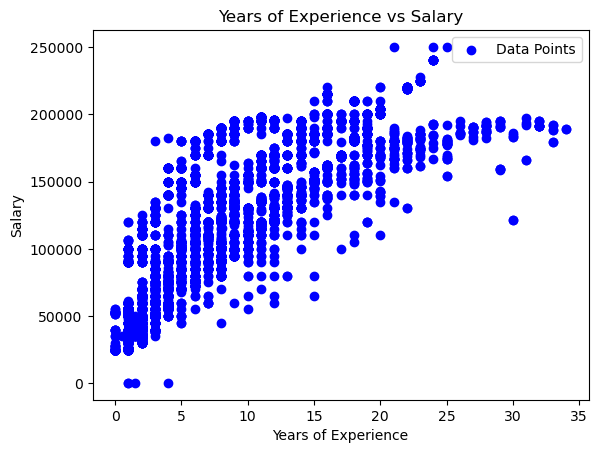

In [ ]:
X = df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
y = df['Salary']
# Use a single numeric feature for visualization (example: Years of Experience)
x = df['Years of Experience']
plt.scatter(x, y, color="blue", label="Data Points")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience vs Salary")
plt.legend()
plt.show()


R² Score: 0.6651373775607005
Mean Absolute Error: 24253.32142738573


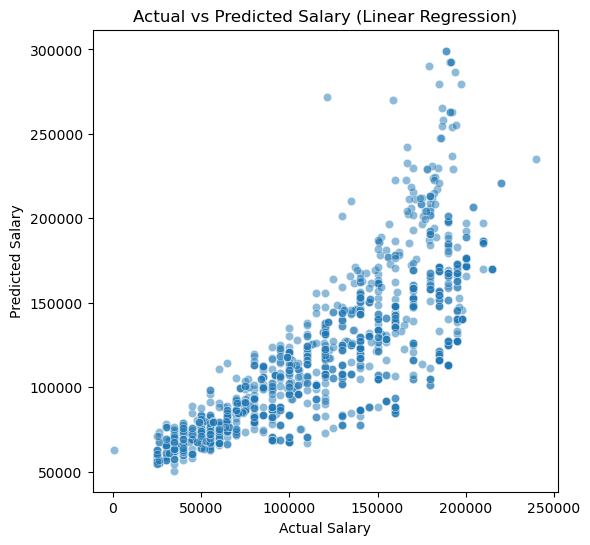

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
X = df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary (Linear Regression)")
plt.show()

C:\Users\Delfi benny\AppData\Local\Temp\ipykernel_21396\2333801419.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\Delfi benny\AppData\Local\Temp\ipykernel_21396\2333801419.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\Delfi benny\AppData\Local\Temp\ipykernel_21396\2333801419.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

R² Score: 0.8370807179643645
Mean Absolute Error: 16735.16912463295


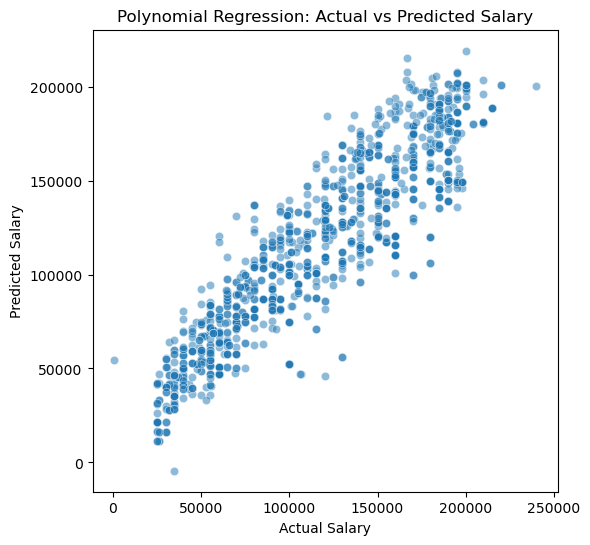

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
y = df['Salary']
X = df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
categorical_cols = ['Gender', 'Education Level', 'Job Title']
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
# Polynomial Features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Polynomial Regression: Actual vs Predicted Salary")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Make a copy to avoid modifying the original accidentally
df_encoded = df.copy()
# Find all object (string) columns
cat_cols = df_encoded.select_dtypes(include=['object']).columns
# Encode each categorical column
le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])
# Now choose X and y again
X = df_encoded[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
y = df_encoded['Salary']
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


Random Forest R² Score: 0.977879177095748
MAE: 3278.2346992343128


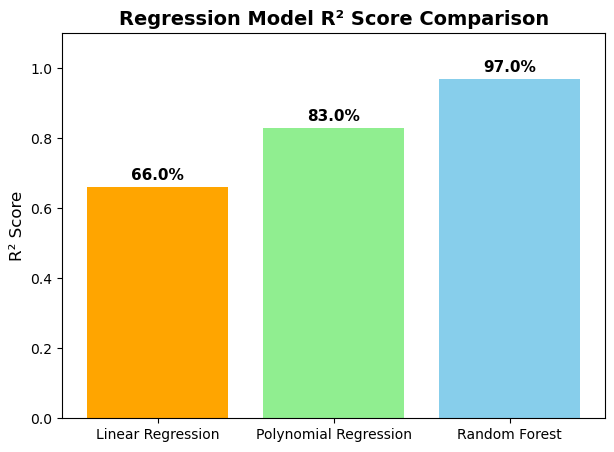

In [28]:
import matplotlib.pyplot as plt
# Model R² Scores
acc_lin = 0.66          # Linear Regression
acc_poly = 0.83         # Polynomial Regression
acc_rf = 0.97           # Random Forest
plt.figure(figsize=(7,5))
plt.bar(['Linear Regression', 'Polynomial Regression', 'Random Forest'],
        [acc_lin, acc_poly, acc_rf],
        color=['orange', 'lightgreen', 'skyblue'])
plt.title('Regression Model R² Score Comparison', fontsize=14, fontweight='bold')
plt.ylabel('R² Score', fontsize=12)
plt.ylim(0, 1.1)
# Display accuracy values above bars
for i, acc in enumerate([acc_lin, acc_poly, acc_rf]):
    plt.text(i, acc + 0.02, f'{acc*100:.1f}%', ha='center', fontsize=11, fontweight='bold')
plt.show()


<h2>conclusion<h2>

The dataset uses features (X) such as Age, Gender, Education Level, Job Title, and Years of Experience to predict the target variable (y), which is Salary. When Linear Regression was applied, it achieved an R² score of 66%, while Polynomial Regression improved the performance to 83%. The Random Forest Regressor performed best, achieving an R² score of 97%, indicating a strong ability to predict salaries based on the input features.